# Deep Learning
<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcinsawinski/UEP_KIE_DL_CODE2024/blob/main/dl01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Helpers - you can skip it, no need to read it.
- Generate 4 simple datasets
- Functions for visualization

NOTE: The decision boundary is given by the equation:

  $
  w_1 x_1 + w_2 x_2 + b = 0
  $
  
  Solve for $x_2$:

  $
  x_2 = -\frac{w_1 x_1 + b}{w_2}
  $

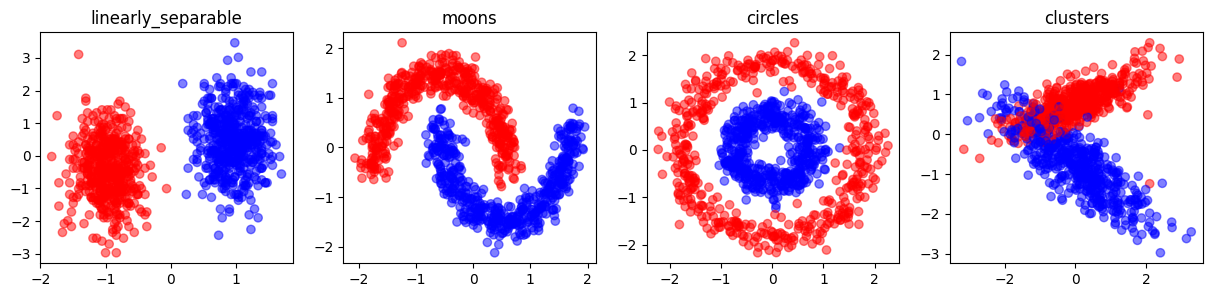

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler

# Constants
N_SAMPLES = 1000
RANDOM_STATE = 1
TEST_SIZE = 0.2
CM_BRIGHT = ListedColormap(["#FF0000", "#0000FF"])
LINEARLY_SEPARABLE_DISTANCE = 5


def make_linearly_separable(n_samples=100, random_state=42):
    """Generates linearly separable data."""
    np.random.seed(random_state)
    class_size = n_samples // 2
    X1 = np.round(np.random.normal(0, 1, (class_size, 2)), 1)
    X2 = np.round(np.random.normal(0, 1, (class_size, 2)), 1) + [7, 1]
    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(class_size), np.ones(class_size)))
    perm = np.random.permutation(len(X))
    X, y = X[perm], y[perm]
    return X, y


def generate_datasets():
    """Generates datasets including an additional linearly separable dataset."""
    datasets = {
        "linearly_separable": make_linearly_separable(
            n_samples=N_SAMPLES,
            random_state=RANDOM_STATE,
        ),
        "moons": make_moons(noise=0.1, random_state=RANDOM_STATE, n_samples=N_SAMPLES),
        "circles": make_circles(
            noise=0.1, factor=0.4, random_state=RANDOM_STATE, n_samples=N_SAMPLES
        ),
        "clusters": make_classification(
            n_features=2,
            n_redundant=0,
            n_informative=2,
            random_state=RANDOM_STATE,
            n_clusters_per_class=1,
            n_samples=N_SAMPLES,
        ),
    }
    # scale X
    scaled_datasets = {}
    for name, (X, y) in datasets.items():
        X_scaled = StandardScaler().fit_transform(X)
        scaled_datasets[name] = (X_scaled, y)
    return scaled_datasets


def plot_datasets(datasets):
    """Plots training and test sets for all datasets."""
    _, axs = plt.subplots(1, len(datasets), figsize=(15, 3))

    for i, (name, data) in enumerate(datasets.items()):
        X, y = data
        axs[i].scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=CM_BRIGHT,
            alpha=0.5,
        )
        axs[i].set_title(name)
    plt.show()


def plot_datapoints(X, y):
    """Plots data points with different colors for each class."""
    plt.scatter(*X[y == 0].T, color=CM_BRIGHT.colors[0], alpha=0.5, label="Class 0")
    plt.scatter(*X[y == 1].T, color=CM_BRIGHT.colors[1], alpha=0.5, label="Class 1")


def plot_decision_boundary(X, w, b, alpha=1, label="init"):
    """Plots a decision boundary given the weight vector."""
    if label == "init":
        color = "k"
        ls = "dotted"
    elif label == "end":
        color = "k"
        ls = "-"
    else:
        color = "y"
        ls = "dotted"
    epsilon = 1e-10
    x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
    x2_vals = -(w[0] * x1_vals + b) / (w[1] + epsilon)
    plt.plot(x1_vals, x2_vals, ls=ls, color=color, alpha=alpha, label=label)
    lines, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, lines))  # Removes duplicates
    plt.legend(unique_labels.values(), unique_labels.keys())
    plt.ylim(X[:, 1].min(), X[:, 1].max())


datasets = generate_datasets()
plot_datasets(datasets)

**Example how to plot decision boundary**

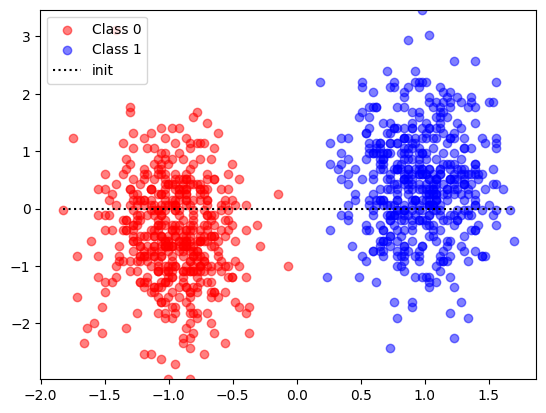

In [2]:
# Generate first dataset
X, y = datasets["linearly_separable"]

# Dummy weights - not a real decision boundary
w = np.array([0, 0], dtype=float)
b = 0.0

# Plot the data and decision boundary
plot_datapoints(X, y)
plot_decision_boundary(X, w, b)
plt.show()

---
# Exercise 1: Implementing a Perceptron

In this exercise, you will implement a simple **Perceptron** learning algorithm. The perceptron is one of the earliest machine learning models, capable of classifying linearly separable data using a decision boundary.


## Step 1: Define the Heaviside Step Function
The perceptron uses a **step function** as its activation function:

$
Heaviside(z) =
\begin{cases}
0, & \text{if } z < 0 \\
1, & \text{if } z \geq 0
\end{cases}
$

Implement a function that takes a scalar input $z$ and returns 0 or 1 accordingly.

## Step 2: Implement the Perceptron Function
Create a function `perceptron(X, y, lr, epochs)`, where:

- `X`: A NumPy array of shape $(m, n)$ representing $m$ training samples with $n$ features.
- `y`: A NumPy array of shape $(m, 1)$ containing the target values (0 or 1).
- `lr` ($\eta$): The learning rate, a small positive constant that controls weight updates.
- `epochs`: The number of training iterations on entire dataset.



**Initialization**

- Initialize the **weight vector** $w$ of shape $(n, 1)$ with zeros.
- Initialize the **bias** $b$ as `0`.

**Training Loop**

Get the shape of training dataset assigning number of rows to variable m and number of columns to n e.g. `m, n = X.shape`

Iterate through epochs (use outer loop `for _ in range(epochs)`)

For each epoch iterate through all training instances (use inner loop `for i in range(m)`):
   - Compute the weighted sum:
     $z = x_i^T w + b$
     where:
       - $x_i$ is the $i^{\text{th}}$  row of $X$,
       - $w$ is the weight vector,
       - $b$ is the bias.

       NOTE: rows of X contain transposed data (they are already row vectors) so use `z = np.dot(x[i], w)`

   - Compute the output prediction:
     $
     \hat{y} = Heaviside(z)
     $
   - Update the weights using the perceptron learning rule:

     $w_j^{(next)} = w_j + \eta (y_i - \hat{y}) x_{i,j}$ for each feature $j$

     e.g. `w += lr * (y[i] - y_pred) * X[i]`.
   - Update the bias:

     $b^{(next)} = b + \eta (y_i - \hat{y})$

     e.g.`b += lr * (y[i] - y_pred)`

**Return tuple weights and bias**
- The final trained weight vector $w$.
- The final bias term $b$.

    e.g. `return w, b`

## Step 3: Visualizing the Decision Boundary
- After training, plot the dataset along with the learned decision boundary using a function `plot(X, y, w, b)`.



**Expected Outcome**
- The perceptron should correctly classify linearly separable data.
- The visualization should show how the perceptron separates two classes using a straight line.

Now, implement each step in code! 🚀

## Put your code below by replacing ```pass``` command.

In [58]:
import numpy as np


def step_function(z):
    """
    Step activation function
    """
    return 1 if z >= 0 else 0


def perceptron(X, y, lr=0.01, epochs=10):
    """
    Perceptron learning algorithm

    Parameters:
    X: numpy array of shape (m, n) - Input features
    y: numpy array of shape (m,1) - Labels (0 or 1)
    lr: float - Learning rate
    epochs: int - Number of training epochs

    Returns:
    w: numpy array - Learned weights
    """
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights
    b = 0  # Initialize bias
    plot_decision_boundary(X, w, b, label="init")
    for _ in range(epochs):
        for i in range(m):
            z = np.dot(X[i], w) + b
            y_pred = step_function(z)
            w += lr * (y[i] - y_pred) * X[i]
            b += lr * (y[i] - y_pred)
        plot_decision_boundary(
            X, w, b, label="training"
        )
    return w, b

**OPTIONAL: you can visualize how weights and biases change during training by adding `plot_decision_boundary` call**
- add `plot_decision_boundary(X, w, b, label="init")` after initializing Weights and bias but before iterating over epochs
- add `plot_decision_boundary(X, w, b, label="training")' after each epoch

see example below

In [56]:
def perceptron(X, y, lr=0.01, epochs=10):
    m, n = X.shape
    w = np.zeros(n)  # Initialize weights
    b = 0  # Initialize bias
    plot_decision_boundary(X, w, b, label="init")  # visualize initial parameters
    for _ in range(epochs):
        for i in range(m):
            # Calculate z
            # Calculate y_pred
            # Weight and bias update rule
            pass
        plot_decision_boundary(
            X, w, b, label="training"
        )  # visualize parameters during training
    return w, b

## Test your solution

**Final params. weights: [0.02860319 0.00089399] bias: 0.0


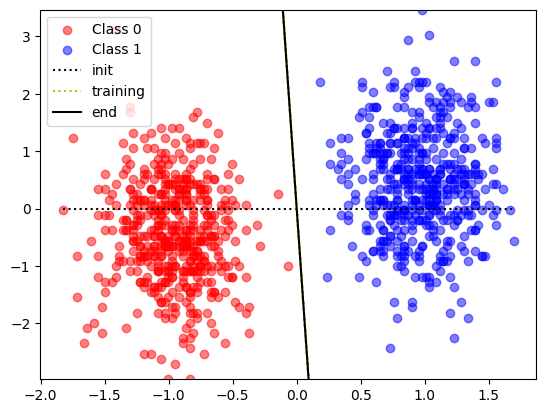

In [59]:
# Generate data
X, y = datasets["linearly_separable"]

# Plot data points
plot_datapoints(X, y)

# Train perceptron
w, b = perceptron(X, y, 0.01, 5)

# Print result and plot final decision boundary
print(f"**Final params. weights: {w} bias: {b}")
plot_decision_boundary(X, w, b, label="end")

---

# Excercise 2: Multilayer Perceptron (MLP)



Your task is to implement a simple Multi-Layer Perceptron (MLP) with one hidden layer. The model should use the **sigmoid activation function** and be able to perform binary classification.


1. Implement the Sigmoid Function and its Derivative

    The **sigmoid function** is used as the activation function in this neural network. It is defined as: $\sigma(x) = \frac{1}{1 + e^{-x}}$

    In python can be implemented with numpy e.g. `1 / (1 + np.exp(-z))`.

    The **derivative of the sigmoid function** is: $\sigma'(x) = \sigma(x) (1 - \sigma(x))$

    Note: reuse $\sigma(x)$ implementation for calculating derivative.


2. Create an MLP Class with 4 methods: `__init__`, `forward', `fit`, `predict`

    You will create a class `MLP` that represents a **neural network** with one hidden layer.


3. Implement the `__init__` Method of MLP Class

    The `__init__` method initializes the neural network with:
    - **Input size** (`input_size`): The number of input features.
    - **Hidden layer size** (`hidden_size`): The number of neurons in the hidden layer.
    - **Learning rate** (`learning_rate`): The step size for updating weights.

    Method should also perform __Weight and Bias Initialization__ as follows:
    - **Weights** (`W1` and `W2`) are initialized as small random values.
    - **Biases** (`b1` and `b2`) are initialized to zero.

    The sizes of Weight and Bias are as follows:
    - Weights for the hidden layer (`W1`): $ W_1 \in \mathbb{R}^{\text{input\_size} \times \text{hidden\_size}} $
    - Bias for the hidden layer (`b1`): $ b_1 \in \mathbb{R}^{\text{hidden\_size}} $
    - Weights for the output layer (`W2`): $ W_2 \in \mathbb{R}^{\text{hidden\_size} \times 1} $
    - Bias for the output layer (`b2`): $ b_2 \in \mathbb{R} $

    Example: having 2 features (columns) in dataset and 4 neurons in hidden layer and 1 neuron in output layer we'd have:
    - the weights for the hidden layer will be a matrix with size 2 rows x 4 columns, bias will be a single vector with 4 elements
     - the weights for the output layer will be a matrix with size 4 rows x 1 columns, bias will be a single vector with 1 element
     - input layer has no weights ( its not a NN layer as such)

5. Implement the `fit` Method to train  the neural network using **gradient descent**. It should include:

    **Feedforward Pass**

    - Compute **hidden layer activation**:

        $Z_1 = X W_1 + b_1$

        $ A_1 = \sigma(Z_1)$

    - Compute **output layer activation**:

        $Z_2 = A_1 W_2 + b_2$

        $A_2 = \sigma(Z_2)$

    - $A_2$ is the predicted probability of class **1**.

    **Backpropagation**
        We compute the gradients and update weights using **gradient descent**.

    - Compute the **error at the output layer**:

        For binary classification, we use the **binary cross-entropy (BCE) loss function**:

        $L = -\frac{1}{m} \sum \left[ Y \log A_2 + (1 - Y) \log (1 - A_2) \right]$

        where:
        - \( Y \) is the true label (0 or 1),
        - \( A_2 \) is the predicted probability (output of sigmoid),
        - \( m \) is the number of training samples.

        The gradient of BCE loss with respect to \( Z_2 \) simplifies to:
        $\frac{\partial L}{\partial Z_2} = A_2 - Y$

        Thus, we define the **error at the output layer** as:

        $\text{Error} = A_2 - Y$

        NOTE: This term is **not** the BCE loss itself but rather its derivative with respect to \( Z_2 \). This simplification occurs naturally because of the properties of the sigmoid function.

    - Compute **gradient for `W2` and `b2` (output layer)**:

        $dZ_2 = A_2 - Y$

        $dW_2 = A_1^T dZ_2$

        $db_2 = \sum dZ_2$

    - Compute **gradient for `W1` and `b1` (hidden layer)**:

        $dZ_1 = (A_2 - Y) W_2^T \cdot \sigma'(Z_1)$

        $dW_1 = X^T dZ_1$

        $db_1 = \sum dZ_1$

    - **Update weights and biases** using gradient descent:

        $W_1 = W_1 - \eta dW_1$

        $b_1 = b_1 - \eta db_1$

        $W_2 = W_2 - \eta dW_2$

        $b_2 = b_2 - \eta db_2$
        
        where ( $\eta$ ) is the **learning rate**.   


6. Implement the `forward` method that performs a **feedforward pass** on new data and returns **probability of positive class.**

    - Compute **hidden layer activation**:

        $Z_1 = X W_1 + b_1$

        $ A_1 = \sigma(Z_1)$

    - Compute **output layer activation**:

        $Z_2 = A_1 W_2 + b_2$

        $A_2 = \sigma(Z_2)$

    - $A_2$ is the predicted probability of class **1**.

6. Implement the `predict` method that returns **binary predictions (0 or 1).**

    - Call `forward` method to get $A_2$ (activations of output layer)

    - Convert **probabilities into binary predictions**:

        $ \hat{y} =
        \begin{cases}
        1, & \text{if } A_2 \geq 0.5 \\
        0, & \text{otherwise}
        \end{cases}
        $

This exercise will help you understand the basic concepts of **feedforward neural networks**, **backpropagation**, and **gradient descent**.

## Put your code below by replacing ```pass``` command.

In [49]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_derivative(z):
    return sigmoid(z) * (1-sigmoid(z))


class MLP:

    def __init__(self, input_size, hidden_size, learning_rate, epochs=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        self.W1 = np.random.randn(input_size, hidden_size) * 0.1

        self.b1 = np.zeros(hidden_size)

        self.W2 = np.random.randn(hidden_size, 1) * 0.1

        self.b2 = np.zeros(1)

    def fit(self, X, y):

        # if y.ndim == 1:
        #   y = y.reshape(-1, 1)

        for epoch in range(self.epochs):
          predictions = self.forward(X)

          m = X.shape[0]

          # Output layer gradients
          dZ2 = predictions - y
          dW2 = (1/m) * self.A1.T @ dZ2
          db2 = (1/m) * np.sum(dZ2, axis=0)

          # Hidden layer gradients
          dZ1 = (dZ2 @ self.W2.T) * sigmoid_derivative(self.Z1)
          dW1 = (1/m) * X.T @ dZ1
          db1 = (1/m) * np.sum(dZ1, axis=0)

          # Update weights
          self.W1 = self.W1 - self.learning_rate * dW1
          self.b1 = self.b1 - self.learning_rate * db1
          self.W2 = self.W2 - self.learning_rate * dW2
          self.b2 = self.b2 - self.learning_rate * db2


          if epoch % 100 == 0:
            loss = self.calculate_loss(y, predictions)
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def calculate_loss(self, y_true, y_pred):
      epsilon = 1e-8
      y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

      loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
      return loss

    def forward(self, X):

        self.Z1 = X @ self.W1 + self.b1
        self.A1 = sigmoid(self.Z1)

        self.Z2 = self.A1 @ self.W2 + self.b2
        self.A2 = sigmoid(self.Z2)

        return self.A2

    def predict(self, X):
        probabilites = self.forward(X)
        return (probabilites >= 0.5).astype(int)

    def predict_proba(self, X):

        proba = self.forward(X)
        return np.column_stack([1 - proba.flatten(), proba.flatten()])

    def score(self, X, y):

        predictions = self.predict(X)
        return np.mean(predictions == y)

## Test your solution

In [50]:
# Generate data
X, y = datasets["linearly_separable"]

mlp = MLP(input_size=2, hidden_size=4, learning_rate=0.01)

y = y.reshape(-1, 1)

# train the MLP on the training data
mlp.fit(X, y)

# make predictions on the test data
y_train_pred = mlp.predict(X)

# evaluate the accuracy of the MLP
accuracy_train = np.mean(y_train_pred == y)
print(f"Accuracy (train): {100*accuracy_train:.2f}")

Epoch 0, Loss: 0.6869
Epoch 100, Loss: 0.6837
Epoch 200, Loss: 0.6799
Epoch 300, Loss: 0.6755
Epoch 400, Loss: 0.6700
Epoch 500, Loss: 0.6634
Epoch 600, Loss: 0.6553
Epoch 700, Loss: 0.6454
Epoch 800, Loss: 0.6335
Epoch 900, Loss: 0.6194
Accuracy (train): 96.60


## Compare to other models
- add `predict_proba` and `score` methods to `MLP` class to return probabilities and accuracy in sklearn-compatible format

```
def predict_proba(self, X):
    pos = self.forward(X)
    neg = 1-pos
    return np.column_stack((neg, pos))

def score(self, X, y):
    y_pred = self.predict(X)
    return np.mean(y_pred == y)
```
- uncomment MLP lines in `classifiers` list in the code below
```
    ("MLP4", MLP(input_size=2, hidden_size=4)),
    ("MLP8", MLP(input_size=2, hidden_size=8)),
```

- experiment with various `hidden_size` values for MLP. when changin `classifiers` list change also `names` list


Fitted Nearest Neighbors on linearly_separable dataset in 0.000001 seconds
Fitted RBF SVM on linearly_separable dataset in 0.000001 seconds
Fitted Random Forest on linearly_separable dataset in 0.000001 seconds
Epoch 0, Loss: 0.7009
Epoch 100, Loss: 0.6970
Epoch 200, Loss: 0.6951
Epoch 300, Loss: 0.6940
Epoch 400, Loss: 0.6931
Epoch 500, Loss: 0.6922
Epoch 600, Loss: 0.6914
Epoch 700, Loss: 0.6904
Epoch 800, Loss: 0.6893
Epoch 900, Loss: 0.6879
Fitted MLP4 on linearly_separable dataset in 0.000001 seconds
Epoch 0, Loss: 0.7091
Epoch 100, Loss: 0.6973
Epoch 200, Loss: 0.6929
Epoch 300, Loss: 0.6902
Epoch 400, Loss: 0.6877
Epoch 500, Loss: 0.6850
Epoch 600, Loss: 0.6820
Epoch 700, Loss: 0.6786
Epoch 800, Loss: 0.6744
Epoch 900, Loss: 0.6693
Fitted MLP8 on linearly_separable dataset in 0.000001 seconds
Fitted Nearest Neighbors on moons dataset in 0.000001 seconds
Fitted RBF SVM on moons dataset in 0.000001 seconds
Fitted Random Forest on moons dataset in 0.000001 seconds
Epoch 0, Loss: 0.

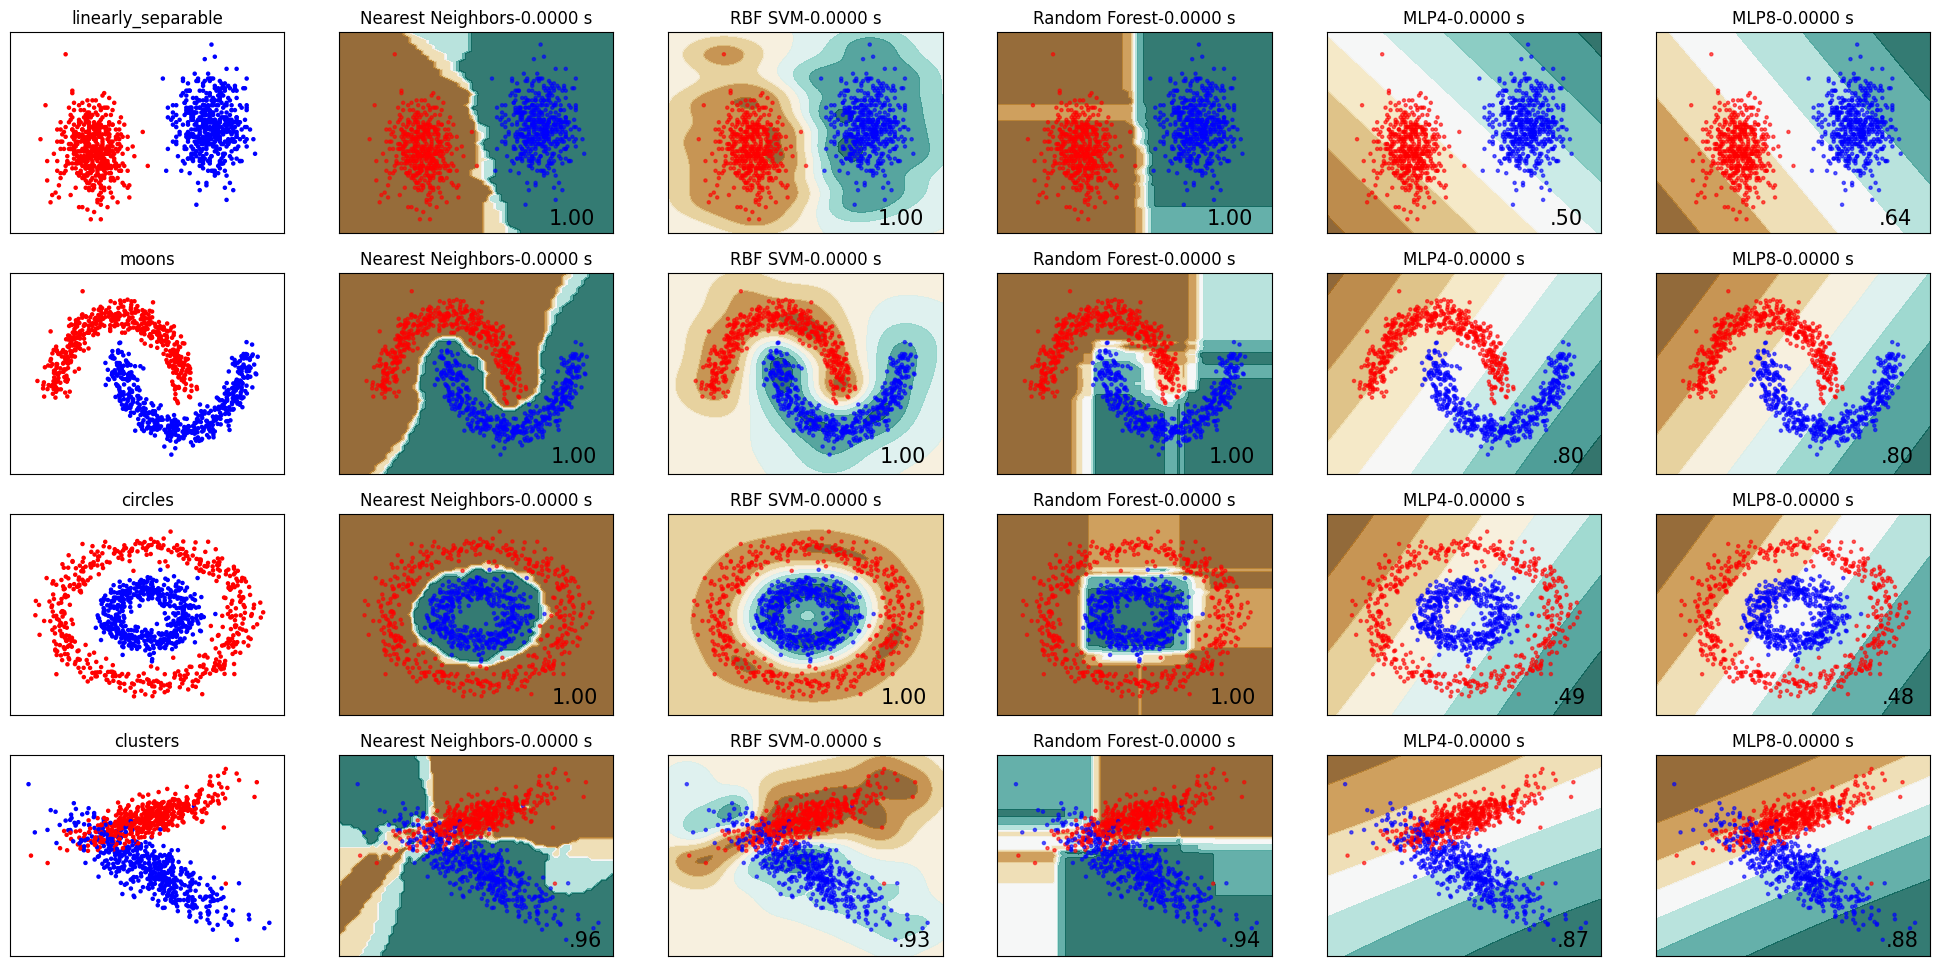

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time

MESH = 0.1  # step size in the mesh
SIZE = 5  # point size

# classifiers for comparison - experiment by adding or changing
classifiers = [
    ("Nearest Neighbors", KNeighborsClassifier(3)),
    ("RBF SVM", SVC(gamma=2, C=1)),
    (
        "Random Forest",
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    ),
     ("MLP4", MLP(input_size=2, hidden_size=4, learning_rate=0.01)),
     ("MLP8", MLP(input_size=2, hidden_size=8, learning_rate=0.01)),
]

fig, axs = plt.subplots(len(datasets), len(classifiers) + 1, figsize=(20, 12))
# iterate over datasets
for i, ds in enumerate(datasets.keys()):

    X, y = datasets[ds]

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, MESH), np.arange(y_min, y_max, MESH))
    X_mesh = np.c_[xx.ravel(), yy.ravel()]
    # just plot the dataset first
    cm = plt.cm.BrBG  # RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])

    ax = axs[i, 0]
    # Plot the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=SIZE)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(ds)

    # iterate over classifiers
    for j, (name, clf) in enumerate(classifiers, start=1):
        ax = axs[i, j]
        start_time = time.perf_counter()
        fit_time = time.perf_counter() - start_time
        if "MLP" in name:
          y = y.reshape(-1, 1)
          clf.fit(X, y)  # Only reshape for MLP
        else:
          clf.fit(X,y)
        print(f"Fitted {name} on {ds} dataset in {fit_time:.6f} seconds")
        score = clf.score(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(X_mesh)
        else:
            Z = clf.predict_proba(X_mesh)[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot also the data points
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.6, s=SIZE)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(f"{name}-{fit_time:.4f} s")
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )

fig.subplots_adjust(left=0.02, right=0.98)
plt.show()